In [69]:
import numpy as np
import cv2 as cv
import os
import json
import matplotlib.pyplot as plt
from PIL import Image


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Given an image containing the lander, generate range and bearing measurements to the lander.


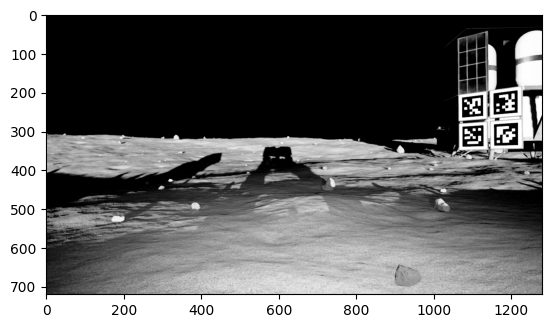

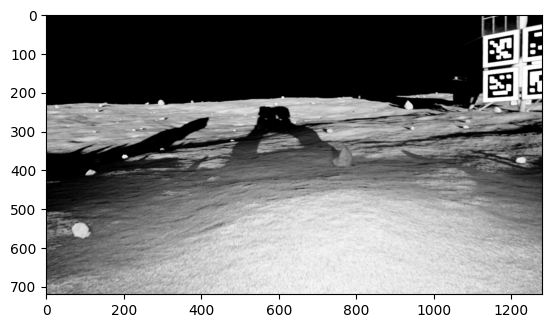

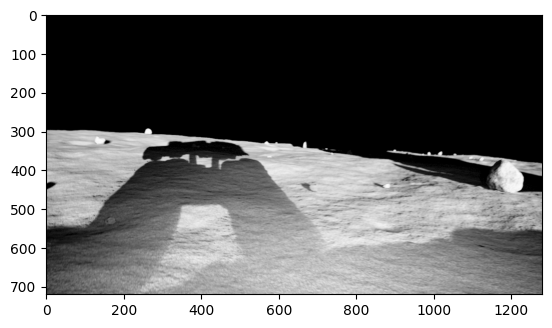

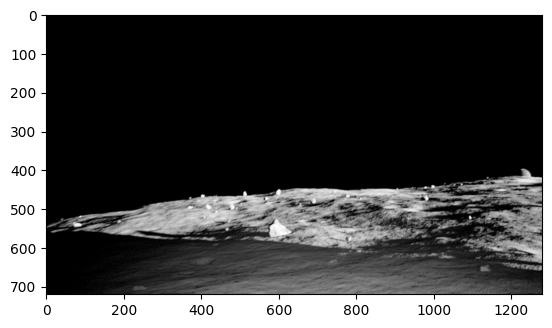

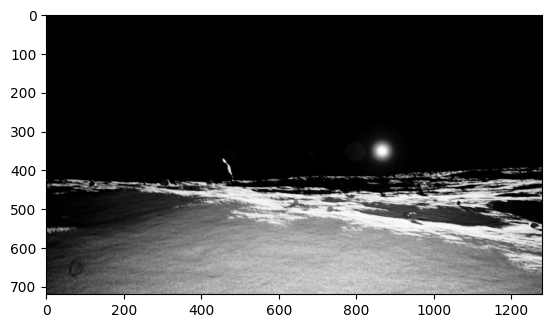

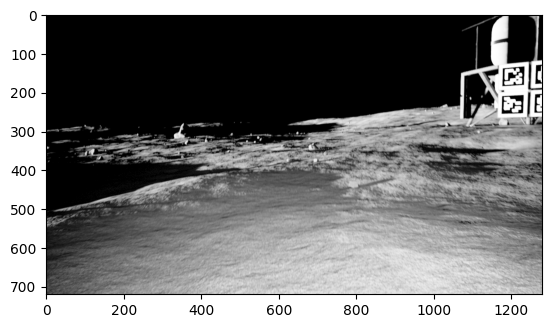

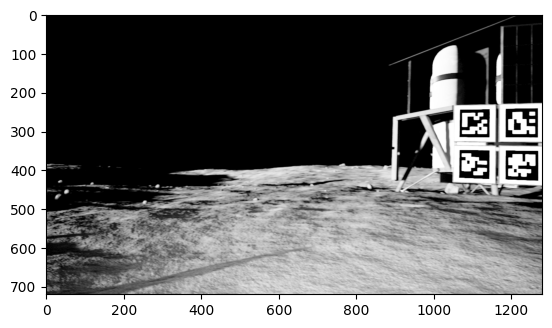

In [70]:
data_path = os.path.expanduser("~/LunarAutonomyChallenge/output/data_collection_1")

## ---- TEST IMAGES FOR FIDUCIAL SHAPE SEG -------------------------------
# true examples
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/35.png # group D
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/124.png # group D
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/1527.png # group A
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/1620.png # group A

# false examples
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/328.png
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/619.png
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/974.png
#------------------------------------------------------------   

i = [35, 124, 328, 619, 974, 1527, 1620]
for ind in i:
    I1 = cv.imread(os.path.join(data_path, "front_left", f"{ind}.png"), cv.IMREAD_GRAYSCALE)
    plt.imshow(I1, cmap="gray")
    plt.show()

In [71]:
json_data = json.load(open(f"{data_path}/data_log.json"))
initial_pose = np.array(json_data["initial_pose"])

# Without fiducials

Use segmentation to identify the lander outline. Next, identify extreme points on the lander outline.
Assuming that we know the lander geometry, we know the location of these points in 3D relative to the
lander center.

Alternatively, we can try to directly predict the lander center (in the image in image coordinates)
from the segmentation.


In [72]:
# from lang_sam import LangSAM
# from cv2 import solvePnP

# model = LangSAM()
# text_prompt = "square."
# SEG_SCORE_THRESH = 0.4 # requires more testing
 
# for ind in i:
#     image_seg_in = Image.open(os.path.join(data_path, "front_left", f"{ind}.png")).convert("RGB")

#     results = model.predict([image_seg_in], [text_prompt])

#     full_mask = np.zeros_like(image_seg_in).copy()
#     for i, mask in enumerate(results[0]["masks"]):
#         if results[0]["scores"][i] < SEG_SCORE_THRESH: 
#             continue
#         full_mask[mask.astype(bool)] = 255

#     plt.imshow(full_mask, cmap="gray")
#     plt.show()


In [73]:
# known fiducial corner positions
fiducial_group_corners = json.load(open(os.path.expanduser("~/LunarAutonomyChallenge/docs/geometry.json")))["lander"]["fiducials"]
geom_fid_a = fiducial_group_corners["a"]
geom_fid_d = fiducial_group_corners["d"] 


In [76]:
# extract ground truth data trajectory
data_log_path = os.path.join(data_path, "data_log.json")
data_log = json.load(open(data_log_path))
lander_pose = np.array(data_log["lander_pose"])

In [77]:
lander_pose

array([[-5.17644501e-02,  9.98542415e-01,  1.52802708e-02,
         6.70792341e+00],
       [-9.98654785e-01, -5.18042791e-02,  2.22209108e-03,
        -3.87358046e+00],
       [ 3.01043561e-03, -1.51446902e-02,  9.99880781e-01,
         4.96357679e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [79]:
lander_pose[0:3, 0:3]

array([[-0.05176445,  0.99854242,  0.01528027],
       [-0.99865478, -0.05180428,  0.00222209],
       [ 0.00301044, -0.01514469,  0.99988078]])

In [75]:
data_log

{'initial_pose': [[-0.05256675433348518,
   -0.9985937845168813,
   0.006869487833545029,
   -3.515538454055786],
  [0.9985481448296814,
   -0.05248084335617459,
   0.012139338442687258,
   -6.900888442993164],
  [-0.011761751402084911,
   0.0074976399538042296,
   0.9999027185677007,
   1.4826946258544922],
  [0.0, 0.0, 0.0, 1.0]],
 'lander_pose': [[-0.051764450114316574,
   0.9985424152381048,
   0.015280270770316382,
   6.707923412322998],
  [-0.9986547846887834,
   -0.051804279064664394,
   0.0022220910848365126,
   -3.8735804557800293],
  [0.0030104356099008153,
   -0.015144690193006138,
   0.9998807807115786,
   4.963576793670654e-05],
  [0.0, 0.0, 0.0, 1.0]],
 'frames': [{'frame': 0,
   'timestamp': 1737495351.646886,
   'mission_time': 0.05000000074505806,
   'current_power': 283.5654602050781,
   'pose': [[-0.05270171206347907,
     -0.9985910135534886,
     0.006206222344932804,
     -3.515631914138794],
    [0.9985485912117236,
     -0.052628348191646634,
     0.011444123194

# Using fiducials
